# This notebook compares the outputs from VESIcal to the experiments of Liu et al. (2015)


In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally

# Testing H2O model

In [3]:
myfile= v.ExcelFile('Liu_1st_Draft_Compilation.xlsx',   input_type='wtpercent', sheet_name='Coding_Checks')
data = myfile.data
data.head()

,Location,Unnamed: 2,Sample name,SiO2,TiO2,Al2O3,FeO,MgO,CaO,Na2O,...,CO2,T,Press,Temp,Fe2O3,Cr2O3,MnO,NiO,CoO,P2O5
Label,,,,,,,,,,,,,,,,,,,,,
Liu et al. 2005 Table 1,"Mono Craters,",California,PD,77.19,0.06,12.8,0.94,0.03,0.53,3.98,...,0,552,0.98,552,0.0,0.0,0.0,0.0,0.0,0.0
Liu et al. 2005 Table 1,"Mono Craters,",California,PD,77.19,0.06,12.8,0.94,0.03,0.53,3.98,...,0,698,0.98,698,0.0,0.0,0.0,0.0,0.0,0.0
Liu et al. 2005 Table 1,"Mono Craters,",California,PD,77.19,0.06,12.8,0.94,0.03,0.53,3.98,...,0,750,0.98,750,0.0,0.0,0.0,0.0,0.0,0.0
Liu et al. 2005 Table 1,"Mono Craters,",California,PD,77.19,0.06,12.8,0.94,0.03,0.53,3.98,...,0,851,0.98,851,0.0,0.0,0.0,0.0,0.0,0.0
Liu et al. 2005 Table 1,"Mono Craters,",California,PD,77.19,0.06,12.8,0.94,0.03,0.53,3.98,...,0,850,0.98,850,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
satPs_wtemps_Liu_Water=myfile.calculate_saturation_pressure(temperature="Temp", model='LiuWater')

Text(0, 0.5, 'Saturation Pressure (VESIcal) Liu')

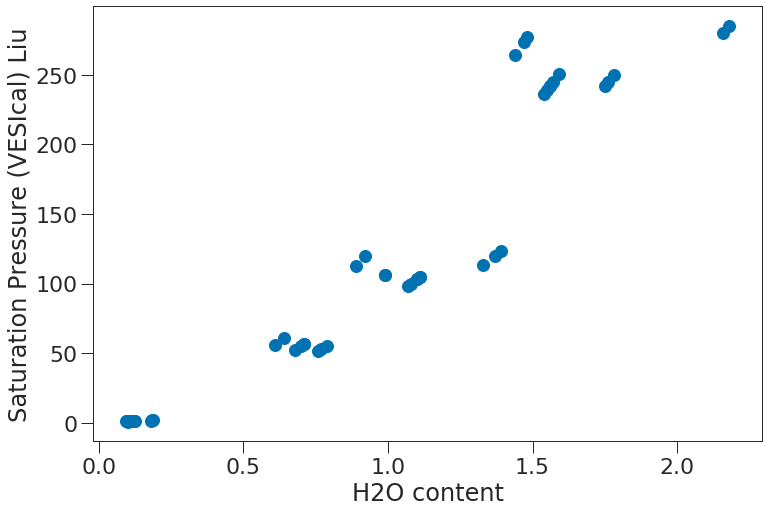

In [5]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
plt.scatter(satPs_wtemps_Liu_Water['H2O'], satPs_wtemps_Liu_Water['SaturationP_bars_VESIcal'])
plt.xlabel('H2O content')
plt.ylabel('Saturation Pressure (VESIcal) Liu')

Text(252, 250, '1:1')

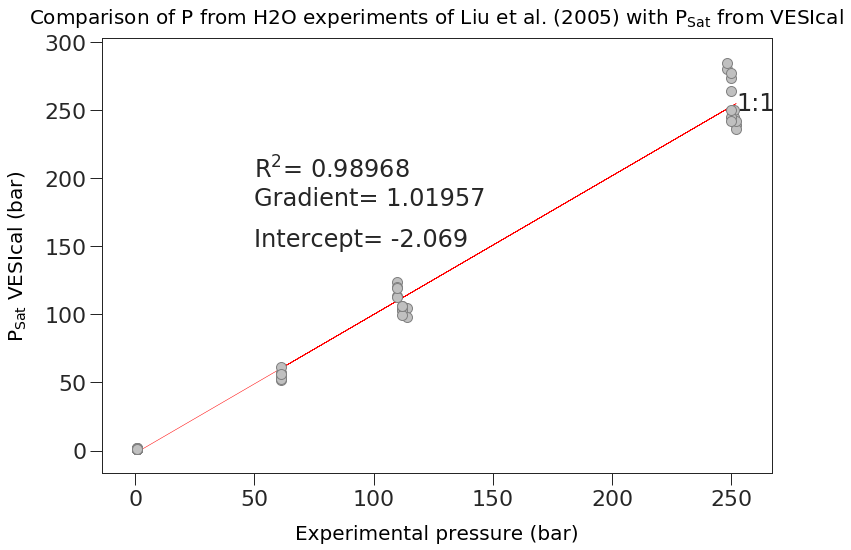

In [6]:
XComb=satPs_wtemps_Liu_Water['Press'] # Convert MPa from their supplement to bars
YComb=satPs_wtemps_Liu_Water['SaturationP_bars_VESIcal']
maskComb = (XComb>-1) & (YComb>-1) & (XComb<7000)
#maskComb = ~np.isnan(XComb) & ~np.isnan(YComb) & XComb<3500
X_noNan=XComb[maskComb].values.reshape(-1, 1)
Y_noNan=YComb[maskComb].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_predComb=lr.predict(X_noNan)

fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of P from H2O experiments of Liu et al. (2005) with P$_{Sat}$ from VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_predComb, color='red', linewidth=0.5, zorder=1)
plt.scatter(satPs_wtemps_Liu_Water['Press'], satPs_wtemps_Liu_Water['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)

I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_predComb), 5)) 
one='1:1'
#plt.plot([0, 6000], [0, 6000])
plt.text(50, 150, I)
plt.text(50, 180, G)
plt.text(50, 200, R)
plt.text(252, 250, one)

# Testing CO2 model

In [7]:
myfile_CO2= v.ExcelFile('Liu_1st_Draft_Compilation.xlsx',   input_type='wtpercent', sheet_name='FogelRutherfordCO2')
data_CO2 = myfile_CO2.data
data_CO2.head()

,Location,Unnamed: 2,Sample name,SiO2,TiO2,Al2O3,FeO,MgO,CaO,Na2O,...,H2O,CO2,Press,Temp,Fe2O3,Cr2O3,MnO,NiO,CoO,P2O5
Label,,,,,,,,,,,,,,,,,,,,,
Fogel and Rutherford - CO2,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,0.1414,0.0597,1010,950,0.0,0.0,0.0,0.0,0.0,0.0
Fogel and Rutherford - CO3,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,0.1123,0.0950,1510,950,0.0,0.0,0.0,0.0,0.0,0.0
Fogel and Rutherford - CO4,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,0.2608,0.1433,1993,950,0.0,0.0,0.0,0.0,0.0,0.0
Fogel and Rutherford - CO5,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,0.1130,0.0188,504,1050,0.0,0.0,0.0,0.0,0.0,0.0
Fogel and Rutherford - CO6,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,0.1284,0.0491,1000,1050,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
satPs_wtemps_Liu_Carbon=myfile_CO2.calculate_saturation_pressure(temperature="Temp", model='LiuCarbon')
satPs_wtemps_Liu_Carbon

/opt/conda/lib/python3.7/site-packages/scipy/optimize/zeros.py:343: RuntimeWarning: Tolerance of 190.0 reached.
  warnings.warn(msg, RuntimeWarning)


,Location,Unnamed: 2,Sample name,SiO2,TiO2,Al2O3,FeO,MgO,CaO,Na2O,...,Temp,Fe2O3,Cr2O3,MnO,NiO,CoO,P2O5,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
Fogel and Rutherford - CO2,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,950,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,
Fogel and Rutherford - CO3,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,950,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,
Fogel and Rutherford - CO4,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,950,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,
Fogel and Rutherford - CO5,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,1050,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,
Fogel and Rutherford - CO6,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,1050,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,
Fogel and Rutherford - CO7,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,1050,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,
Fogel and Rutherford - CO8,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,1050,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,
Fogel and Rutherford - CO9,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,1050,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,
Fogel and Rutherford - CO10,0.0,0.0,0.0,76.45,0.08,12.56,1.02,0.06,0.25,4.21,...,1050,0.0,0.0,0.0,0.0,0.0,0.0,105.0,LiuCarbon,


(100, 120)

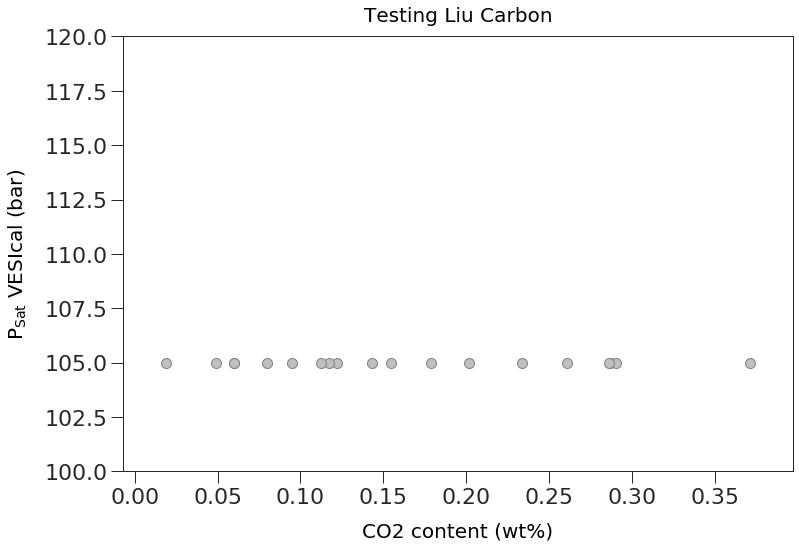

In [9]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Testing Liu Carbon',
        fontdict= font, pad = 15)
plt.xlabel('CO2 content (wt%)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.scatter(satPs_wtemps_Liu_Carbon['CO2'], satPs_wtemps_Liu_Carbon['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
plt.ylim([100, 120])

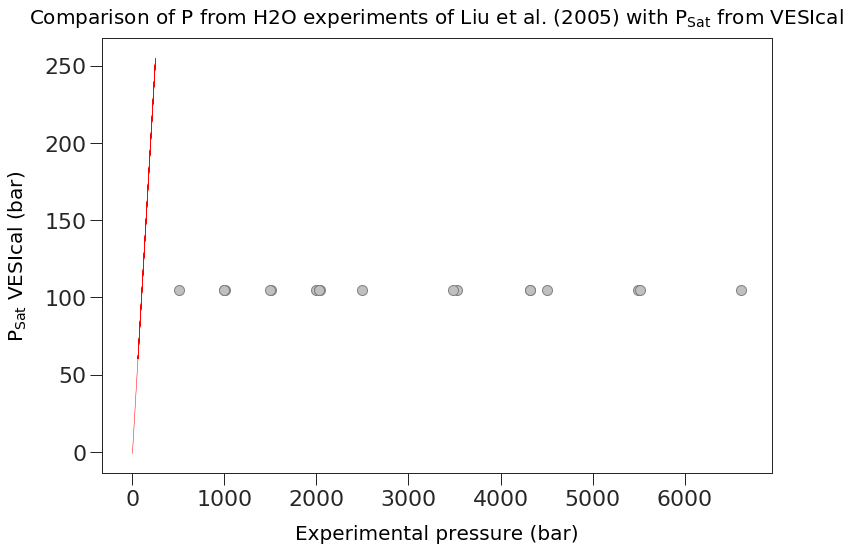

In [10]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of P from H2O experiments of Liu et al. (2005) with P$_{Sat}$ from VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_predComb, color='red', linewidth=0.5, zorder=1)
plt.scatter(satPs_wtemps_Liu_Carbon['Press'], satPs_wtemps_Liu_Carbon['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)


In [11]:
#SingleSampleProcessing
my_sample = {'SiO2':  76.45, 
             'TiO2':   0.08, 
             'Al2O3': 12.56, 
             'Fe2O3':  0,
             'Cr2O3':  0.0, 
             'FeO':    1.02, 
             'MnO':    0.0,
             'MgO':    0.06, 
             'NiO':    0.0, 
             'CoO':    0.0,
             'CaO':    0.25, 
             'Na2O':   4.2, 
             'K2O':    4.78, 
             'P2O5':   0.0, 
             'H2O':    0.14,
             'CO2':    0.6}
v.calculate_saturation_pressure(sample=my_sample, temperature=950, verbose=True, model='LiuCarbon').result

/opt/conda/lib/python3.7/site-packages/scipy/optimize/zeros.py:343: RuntimeWarning: Tolerance of 190.0 reached.
  warnings.warn(msg, RuntimeWarning)


105.0